Nom 1: Eric Escrich

Nom 2: Adrià Vilarinyo

# Repte 3: Consum de combustible

## Definició del problema

Es vol predir el consum de combustible de diferents models de cotxes dels anys 70. Per fer-ho disposem d'un *dataset* amb diferents aspectes tècnics dels diferents models i el seu consum. Aquestes són les dades que conté:


*   Miles per Gallon (mpg): *variable contínua*
*   cylinders: *variable discreta de valors múltiples*
*   displacement: *variable contínua*
*   horsepower: *variable contínua*
*   weight: *variable contínua*
*   acceleration: *variable contínua*
*   model year: *variable discreta de valors múltiples*
*   origin: *variable categòrica*

Aquest dataset es pot descarregar de [https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data](https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data)

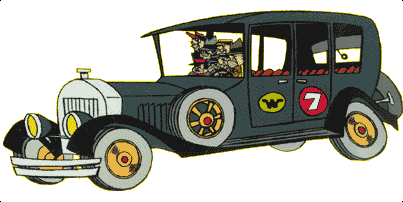

## Preparació de les dades

In [8]:
# Importa les llibreries que necessitaràs
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import urllib.request
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [7]:
# Descarrega el dataset fent servir el packet urllib de Python i guarda-ho amb el nom auto-mpg.data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
filename = 'auto-mpg.data'
urllib.request.urlretrieve(url, filename)

('auto-mpg.data', <http.client.HTTPMessage at 0x1e377e73530>)

In [10]:
# Importa el dataset descarregat com a csv, afegint els noms de les columnes i ajustant els paràmetres na_values, comment, sep, skipinitialspace, etc.
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

# Importar el dataset
df = pd.read_csv(
    'auto-mpg.data', 
    delim_whitespace=True, 
    names=column_names, 
    na_values='?', 
    comment='\t', 
    skipinitialspace=True
)

df.tail()
# Mostra les últimes 5 fil·les


D:\Temp\ipykernel_16032\2507272875.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,chevy s-10


In [ ]:
# Comprova si falta algun valor a tot el conjunt de dades


In [ ]:
# No podem alimentar la xarxa neuronal amb cap valor de tipus Nan o Null, així
# que en cas de que es doni aquesta situació, eliminarem aquestes files per obtenir
# un dataset sense errors.
#
# Elimina les files afectades per aquests errors


In [ ]:
# La columna origin ens indica l'origen del vehicle on: 1-USA, 2-Europa, 3-Japan
# Aquesta és una variable categòrica que haurem de convertir a un vector booleà
# fent ús de la codificació one-hot encoding.
#
# Crea 3 noves columnes (USA, Europe, Japan) amb valor 1 o 0 en funció de la columna
# Origin. Pots fer servir el mètode pop() de Pandas


In [ ]:
# Separa les dades per tal d'obtenir un dataset_train amb el 80% de les mostres i
# un dataset_test amb el 20%. Pots fer servir la funció sample() de Pandas. Crea també
# les variables train_labels i test_labels amb la informació de la columna 'MPG'


## Creació del model 1

### Pregunta 1
Quin tipus de problema és? Regressió, classificació binària o classificació múltiple? Raona la resposta

### Pregunta 2
Quàntes neurones i amb quina funció d'activació haurà de tenir la capa de sortida? Raona la resposta.

In [ ]:
# Crea una xarxa neuronal d'1 neurona anomenada model1 amb la potència (horsepower)
# com a única entrada i el consum (MPG) com a valor a predir. La funció de pèrdua
# serà la mitja de l'error absolut


In [ ]:
# Entrena el model amb les dades d'entrenament


In [ ]:
# Fes una avaluació amb les dades de test


## Creació del model 2

In [ ]:
# Crea una xarxa neuronal d'1 neurona anomenada model2 amb totes les dades (excepte MPG)
# com a entrades i el consum (MPG) com a valor a predir. La funció de pèrdua
# serà la mitja de l'error absolut


In [ ]:
# Entrena el model amb les dades d'entrenament


In [ ]:
# Fes una avaluació amb les dades de test


## Creació del model 3

In [ ]:
# Mostra les principals característiques estadístiques per a cada columna i
# guarda-les a la variable train_stats de forma trasposada


### Pregunta 3
Observant les dades estadístiques, creus que és convenient normalitzar les dades? Raona la resposta.


In [ ]:
# Aquesta funció reescala les característiques en un rang de 0 a 1 (normalització)
# i les centra al 0 (estandarització) amb una desviació estàndard de 1. Aquest és
# un altre tipus de normalització que també s'utilitza sobint

def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

# Aplica la funció anterior a les dades d'entrenament i de prova

# Les columnes USA, Europe i Japan no ens interessa normalitzar-les


In [ ]:
# Comprova la normalització revisant les estadístiques de les dades


### Pregunta 4
Com podem saber que hem realitzat bé la normalització a partir de la informació estadística?

In [ ]:
# Crea una xarxa neuronal d'1 neurona anomenada model3 amb les dades normalitzades.
# La funció de pèrdua serà la mitja de l'error absolut


In [ ]:
# Entrena el model amb les dades d'entrenament normalitzades


In [ ]:
# Fes una avaluació amb les dades de test


## Creació del model 4

In [ ]:
# Crea un model de xarxa neuronal de tipus Dense amb 2 capes de 64 neurones amb
# funció d'activació 'relu' i una capa de sortida


In [ ]:
# Configura i executa l'entrenament del model. Hauràs d'escollir la funció de pèrdua
# adient en funció del tipus de problema a resoldre.
# Farem servir les mètriques 'root mean square error' i 'mean absolute error'.
# Afegeix l'hiperparàmetre validation_split=0.2 a la funció fit()
'''
MAE és més robusta quan tenim valors atípics ja que no fa servir el quadrat de
l'error mentre que MSE és més útil si volem donar més importància als errors grans.
'''


In [ ]:
# Fes una avaluació del model amb les dades de test


### Pregunta 5
Quin significat tenen els números obtinguts a **mae** i **mse**? Diríes que és un error acceptable? Per què?

### Pregunta 6
Quina mitja d'error absolut a obtingut cada un dels models amb les dades de test? Quin model realitza una millor predicció?

## Predicció

In [ ]:
# Mostra la predicció de dos cotxes del dataset de test i la resposta correcta


In [ ]:
# Realitza la predicció d'un suposat cotxe amb:
#   4 cilindres
#   Desplaçament 100
#   50 C.V.
#   1500 kg
#   Acceleració 10 m/s^2
#   Any 82
#   Europeu
